In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the CIFAR10 data set from keras datasets module
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Check the shape of each train and test data set
print('Shape of X train is:', X_train.shape)
print('Shape of y train is:', y_train.shape)
print('Shape of X test is:', X_test.shape)
print('Shape of y test is:', y_test.shape)

### Interpretation of the above code:
# There are total 60000 samples in the CIFAR10 data set
# These 60000 samples are divided into train and test set as 50000-10000 samples
# Each sample in the train and test set of independent variable is an RGB image with shape (32,32,3)
# The entries in the train and test set in dependent variable is discrete data points, numbering from 0 to 9
# The classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Shape of X train is: (50000, 32, 32, 3)
Shape of y train is: (50000, 1)
Shape of X test is: (10000, 32, 32, 3)
Shape of y test is: (10000, 1)


### Basic data exploration:

* Observe, how each sample in independent set looks like
* Observe, how each sample in dependent set looks like
* Use plt.matshow() to observe the first sample in X_train and see if it matches with the first sample of y_train

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
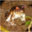

In [3]:
# How each sample of independent set looks like
X_train[0] # First sample

In [4]:
# How the first sample of y_train looks like
y_train[0]

array([6], dtype=uint8)

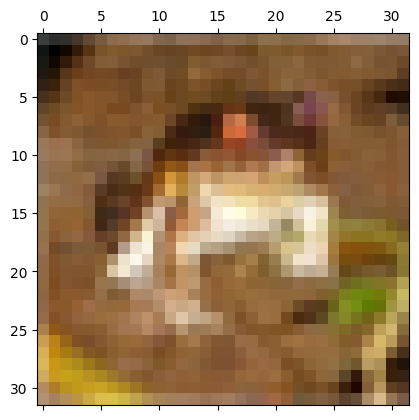

In [5]:
# Check the first sample of X_train as image and see the similarity with y_train
plt.matshow(X_train[0]) # The image is not so proper, but it is same

In [12]:
# Convert the y_train variable into 1D format
y_train_reshape = y_train.reshape(-1,)
y_train_reshape[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
# Define a function say 'get_img' that will take x,y and index as labels
# It will return the image having the label
# Define the classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def get_img(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

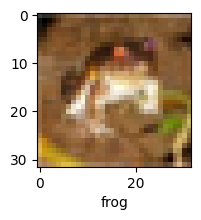

In [14]:
# Apply the function on index 0
get_img(X_train, y_train, 0)

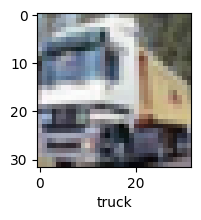

In [9]:
# Apply the function on index 1
get_img(X_train, y_train, 1)

### Data Handling:

* Scaling is an important feature in any ML or deep learning algorithm. Here, since the independent variable set X is numbered matrix of image pixles, so, only X_train and X_test are needed to be scaled.

* Name the new scaled X_train and X_test variable as: X_train_scale and X_test_scale

In [10]:
# Scale the X_train and X_test data set
# Divide X_train and X_test by 255 (their highet values)
X_train_scale = X_train/255
X_test_scale = X_test/255

### ANN model building:

* Name the model as model_ann
* Use the X_train_scale, y_train build the ANN model
* Use the falttened input layer
* Use first hidden layer with 3000 nodes and relu
* Use second hidden layer with 1000 nodes and relu
* Use 10 nodes in output layer with sigmoid
* Compile the model with 'SGD' optimizer, sparse_categorical_crossentropy loss and accuracy metrics
* Fit training data with 5 epochs

In [16]:
# Define the model
model_ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

# Compile the model
model_ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Fit the training data into the model
model_ann.fit(X_train_scale, y_train, epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.3076 - loss: 1.9272
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 87ms/step - accuracy: 0.4209 - loss: 1.6416
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 90ms/step - accuracy: 0.4504 - loss: 1.5542
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.4708 - loss: 1.4942
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 86ms/step - accuracy: 0.4915 - loss: 1.4390


### Interpretation:

* Observe the loss and accuracy of the model_ann on train samples
* After runing 5 epochs, the accuracy is still prety low, close to 49%
* The loss is high, also the model takes much time to run
* Observ model_ann's performance on test data, close to 46%
* So, ANN is not working so great in this case
* Now, we will use CNN to build a better model than model_ann

In [17]:
# Evaluate the model's performance on test sample
model_ann.evaluate(X_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.4625 - loss: 1.5023


[1.5018764734268188, 0.459199994802475]

### CNN Model Building:

* Name the model as model_cnn

* Use First CNN layer with following parameters/hyperparameteres:

    1. Convolutional layer with 32 filters, each of size (3,3), relu actiavtion and input_shape as (32,32,3)
    2. Use Max polling layer of size (2,2)

* Use second CNN layer with following parameters/hyperparameteres:

    1. Convolutional layer with 64 filters, each of size (3,3), relu actiavtion
    2. Use Max polling layer of size (2,2)

* Now use the regular deep learning neural networks as:

    1. Flattened input layer
    2. First hidden layer with 64 nodes, relu activation
    3. Output layer with 10 nodes, softmax activation

* Compile the model model_cnn with following parameters as:

    1. adam optimizer
    2. Sparse_categorical_crossentropy loss
    3. Accuracy metrics

* Fit the training data, X_train_scale and y_train in the model with epochs

In [18]:
# Define the model as model_cnn
model_cnn = keras.Sequential([
    # First CNN layer
    keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    # Second CNN layer
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    # Deep Neural Network Architecture
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model
model_cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Fit the training data in the model
model_cnn.fit(X_train_scale, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 39ms/step - accuracy: 0.3899 - loss: 1.6757
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5959 - loss: 1.1494
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.6494 - loss: 1.0005
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.6873 - loss: 0.9019
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7095 - loss: 0.8354
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.7324 - loss: 0.7694
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7507 - loss: 0.7146
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7681 - loss: 0.6670
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.7809 - loss: 0.6284
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7917 - loss: 0.5947


### Interpretation:

* Compare to the ANN model, this CNN model works best
* However, the process is slow due to some reasons
* The accuracy after 10 epochs is 79%
* The accuracy on the test data is 70%

In [19]:
# Check model performance on test data
model_cnn.evaluate(X_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7063 - loss: 0.8945


[0.911169707775116, 0.7056999802589417]

In [24]:
# Use the model_cnn to get predictions on X_test_scale
# Store the predictions in a variable predictions
predictions = model_cnn.predict(X_test_scale)

# Get the predictions for each sample in predictions
y_pred = [np.argmax(element) for element in predictions]
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


[3, 8, 0, 0, 6]

In [26]:
# Reshape the y_test in a 1D array
y_test_reshape = y_test.reshape(-1,)
y_test_reshape[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [28]:
# Now, calculate the classification report for this model
# Use y_pred and y_test_reshape
print(classification_report(y_pred, y_test_reshape))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1038
           1       0.84      0.80      0.82      1052
           2       0.48      0.72      0.58       675
           3       0.50      0.52      0.51       959
           4       0.65      0.64      0.64      1019
           5       0.66      0.57      0.61      1146
           6       0.85      0.71      0.77      1204
           7       0.73      0.79      0.76       930
           8       0.80      0.83      0.81       966
           9       0.78      0.77      0.78      1011

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.72      0.71      0.71     10000



Text(45.722222222222214, 0.5, 'Actual Values')

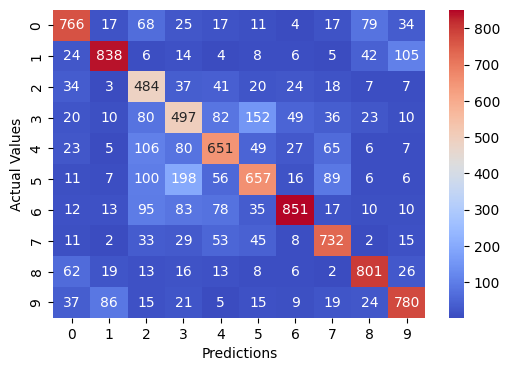

In [29]:
# Calcukate the confusion matrix and visualize it
cnfm = confusion_matrix(y_pred, y_test_reshape)
plt.figure(figsize = (6,4))
sns.heatmap(cnfm, annot = True, fmt = 'd', cmap = 'coolwarm')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')